In [5]:
import os
from pathlib import Path
from transformers import ViTConfig, ViTFeatureExtractor, ViTModel, ViTForImageClassification, ViTImageProcessor
from datasets import load_from_disk

In [4]:
PROJECT_DIR = Path(os.getcwd()).resolve().parent
DATA_DIR = PROJECT_DIR / "data"
PROCESSED_DATA_DIR = DATA_DIR / "processed"

In [6]:
dataset = load_from_disk(PROCESSED_DATA_DIR / "multiclassification_dataset")

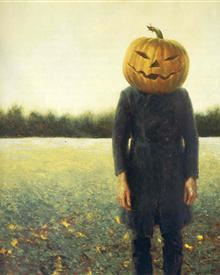

In [8]:
dataset["train"][0]["image"]

In [33]:
extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k", add_pooling_layer=False)

/home/nico/Thesis/neural-artwork-caption-generator/.venv/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
model

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

In [18]:
extractor(dataset["train"][1]["image"])

{'pixel_values': [array([[[-0.05098039, -0.01176471, -0.02745098, ...,  0.27058828,
          0.21568632,  0.09803927],
        [-0.24705881, -0.23137254, -0.27843136, ...,  0.13725495,
          0.14509809,  0.06666672],
        [-0.12941176, -0.16862744, -0.26274508, ..., -0.03529412,
          0.01176476, -0.03529412],
        ...,
        [-0.2862745 , -0.2235294 , -0.3490196 , ..., -0.38039213,
         -0.30196077, -0.34117645],
        [-0.18431371, -0.06666666, -0.24705881, ..., -0.29411763,
         -0.3098039 , -0.41176468],
        [ 0.254902  ,  0.09019613, -0.09803921, ..., -0.21568626,
         -0.40392154, -0.58431375]],

       [[-0.03529412,  0.01176476, -0.02745098, ...,  0.5137255 ,
          0.4431373 ,  0.30980396],
        [-0.19215685, -0.17647058, -0.23137254, ...,  0.36470592,
          0.3411765 ,  0.254902  ],
        [-0.03529412, -0.06666666, -0.1607843 , ...,  0.16078436,
          0.17647064,  0.12156868],
        ...,
        [-0.47450978, -0.3960784 , -

In [35]:
processor(dataset["train"][1]["image"])

{'pixel_values': [array([[[-0.05098039, -0.01176471, -0.02745098, ...,  0.27058828,
          0.21568632,  0.09803927],
        [-0.24705881, -0.23137254, -0.27843136, ...,  0.13725495,
          0.14509809,  0.06666672],
        [-0.12941176, -0.16862744, -0.26274508, ..., -0.03529412,
          0.01176476, -0.03529412],
        ...,
        [-0.2862745 , -0.2235294 , -0.3490196 , ..., -0.38039213,
         -0.30196077, -0.34117645],
        [-0.18431371, -0.06666666, -0.24705881, ..., -0.29411763,
         -0.3098039 , -0.41176468],
        [ 0.254902  ,  0.09019613, -0.09803921, ..., -0.21568626,
         -0.40392154, -0.58431375]],

       [[-0.03529412,  0.01176476, -0.02745098, ...,  0.5137255 ,
          0.4431373 ,  0.30980396],
        [-0.19215685, -0.17647058, -0.23137254, ...,  0.36470592,
          0.3411765 ,  0.254902  ],
        [-0.03529412, -0.06666666, -0.1607843 , ...,  0.16078436,
          0.17647064,  0.12156868],
        ...,
        [-0.47450978, -0.3960784 , -

In [36]:
output = model(processor(dataset["train"][1]["image"], return_tensors="pt").pixel_values)
output.last_hidden_state[:, 0].shape

torch.Size([1, 768])

In [38]:
output

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.0866, -0.1137, -0.1258,  ...,  0.0776, -0.0129,  0.3044],
         [ 0.1806, -0.1091, -0.1490,  ...,  0.0602,  0.0216,  0.1824],
         [ 0.1321, -0.1506, -0.1373,  ..., -0.0214,  0.0272,  0.4125],
         ...,
         [ 0.1725, -0.1717, -0.1218,  ..., -0.0095, -0.0738,  0.1642],
         [ 0.1373, -0.2601, -0.2048,  ..., -0.0471,  0.0151, -0.0159],
         [ 0.2200, -0.2191, -0.2424,  ..., -0.0962, -0.0402,  0.0663]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=None, hidden_states=None, attentions=None)